# <font color='blue'> AirBnB & Zillow Data Challenge
### <font color='organce'>Author: Xiaojun Yao 
### <font color='organce'>Table of Content 

    1.0 Data Quality
        1.1 AirBnB
            Insights on AirBnB's Data Quality 
        1.2 Zillow
            Insights on Zillow's Data Quality 
    
    2.0 Data Cleaning 
        2.1 Tasks for AirBnB Dataset 
        2.2 Tasks for Zillow Dataset
        2.3 Tasks for Profit Dataset
            Insights on Data Cleaning
        
    3.0 Visualization
        3.1 Boxplot
            Insights on Boxplot
        3.2 Barh Graph and Table of Ranking 
            3.2.1 Barh Graph
            3.2.2 Table of Ranking
            3.2.3 Saving Barh Graph to local (can be ignored)
        3.3 Geographic Heatmap
    
    4.0 Investment Recommendations 
    
    5.0 Future Research

#### Import Libraries

In [1]:
# Basic
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Advanced Visualization
import folium
from folium.plugins import HeatMap
import ipywidgets as widgets
import gmplot
from IPython.display import display
from ipywidgets import interact, interact_manual

# Class and Functions (XYAO_functions.py)
from XYAO_functions import *

#### Import Data

In [2]:
file_1 = 'http://data.insideairbnb.com/united-states/ny/new-york-city/2019-07-08/data/listings.csv.gz'
airbnb = pd.read_csv(file_1) 

file_2 = 'Data/Zip_Zhvi_2bedroom.csv' #stored in the Data Folder
zillow = pd.read_csv(file_2) 

# <font color='organce'>1.0 Data Quality

## <font color='organce'>1.1 AirBnB

In [3]:
# quick glance of the dataset
airbnb.head(3)

,id,listing_url,scrape_id,last_scraped,name,summary,space,description,experiences_offered,neighborhood_overview,...,instant_bookable,is_business_travel_ready,cancellation_policy,require_guest_profile_picture,require_guest_phone_verification,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,2539,https://www.airbnb.com/rooms/2539,20190708031610,2019-07-09,Clean & quiet apt home by the park,Renovated apt home in elevator building.,"Spacious, renovated, and clean apt home, one b...",Renovated apt home in elevator building. Spaci...,none,Close to Prospect Park and Historic Ditmas Park,...,f,f,moderate,f,f,6,0,5,1,0.21
1,2595,https://www.airbnb.com/rooms/2595,20190708031610,2019-07-09,Skylit Midtown Castle,"Find your romantic getaway to this beautiful, ...","- Spacious (500+ft²), immaculate and nicely fu...","Find your romantic getaway to this beautiful, ...",none,Centrally located in the heart of Manhattan ju...,...,f,f,strict_14_with_grace_period,t,t,2,1,0,1,0.38
2,3647,https://www.airbnb.com/rooms/3647,20190708031610,2019-07-08,THE VILLAGE OF HARLEM....NEW YORK !,NaN,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,WELCOME TO OUR INTERNATIONAL URBAN COMMUNITY T...,none,NaN,...,f,f,strict_14_with_grace_period,t,t,1,0,1,0,NaN


In [4]:
##############################
# Quality check for airbnb dataset 
##############################

# general information
print(airbnb.info())
print('\n')

# checking column-level data types
print(airbnb.dtypes)
print('\n')

# Checking datasets contents 
print(airbnb.columns)
print('\n')

# Checking column-level missing value
print(airbnb.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48895 entries, 0 to 48894
Columns: 106 entries, id to reviews_per_month
dtypes: float64(22), int64(21), object(63)
memory usage: 39.5+ MB
None


id                                                int64
listing_url                                      object
scrape_id                                         int64
last_scraped                                     object
name                                             object
summary                                          object
space                                            object
description                                      object
experiences_offered                              object
neighborhood_overview                            object
notes                                            object
transit                                          object
access                                           object
interaction                                      object
house_rules          

In [5]:
##############################
# Quality check for valuable columns 
##############################

# Checking value validility of selected column
# Checking for any inconsistent format 
print(airbnb.zipcode.unique()) 
print('\n')
print(airbnb.city.unique()) 
print('\n')
print(airbnb.state.unique()) 
print('\n')
print(airbnb.neighbourhood_group_cleansed.unique()) 
print('\n')
print(airbnb.neighbourhood_cleansed.unique()) 
print('\n')
print(airbnb.bedrooms.unique()) 
print('\n')

['11218' '10018' '10027' '11238' '10029' '10016' '11216' '10019' '10025'
 '10002' '10036' '11215' '10014' '11211' '11205' '10011' '11217' '10034'
 '10003' '10031' '11222' nan '11237' '11226' '10009' '10024' '11225'
 '11101' '11221' '11206' '10010' '11249' '10001' '10162' '10035' '10032'
 '10075' '11377' '11201' '11233' '11231' '10023' '10128' '10040' '11234'
 '11367' '10028' '11104' '10065' '10301' '10452' '10006' '10039' '11385'
 '10021' '11434' '11379' '10026' '11105' '10044' '10022' '10013' '11103'
 '10473' '10475' '11213' '10468' '11102' '10038' '10033' '11427' '11693'
 '10012' '11375' '10470' '10030' '10453' '11223' '10469' '11208' '11207'
 '10451' '11235' '10314' '11209' '11204' '10305' '11232' '10017' '11373'
 '11224' '11372' '11412' '10004' '11203' '11374' '10466' '11106' '10304'
 '11220' '11230' '11210' '10303' '11229' '10463' '11435' '11416' '10080'
 '10005' '10454' '10455' '11236' '10280' '10037' '11355' '11692' '11411'
 '10282' '10307' '11219' '10467' '11358' '11361' '10069

In [6]:
##############################
# Quality check for subset data 
##############################

# Subset a table with selected columns
airbnb_2bedroom = airbnb.loc[airbnb.bedrooms==2]

# Checking missing values for selected columns
print(airbnb_2bedroom.zipcode.isnull().sum())
print(airbnb_2bedroom.neighbourhood_group_cleansed.isnull().sum())
print(airbnb_2bedroom.neighbourhood_cleansed.isnull().sum())
print(airbnb_2bedroom.price.isnull().sum())

# Checking data types for selected columns
print(airbnb_2bedroom[['zipcode','neighbourhood_group_cleansed','neighbourhood_cleansed','price']].dtypes)

# Checking number of duplicated zipcode entries
print(f'''Total number of properties is {len(airbnb_2bedroom)}''')
print(f'''Total number of unique zipcode is {len(airbnb_2bedroom.zipcode.unique())}''')

50
0
0
0
zipcode                         object
neighbourhood_group_cleansed    object
neighbourhood_cleansed          object
price                           object
dtype: object
Total number of properties is 6497
Total number of unique zipcode is 315


## <font color='red'> Insights on AirBnB's Data Quality
##### After exploring the raw dataset, the following insights are concluded.
    
1. <font color='black'>Valuable Location columns include: <font color='red'>'zipcode','neighbourhood_group_cleansed' <font color='black'>and<font color='red'> 'neighbourhood_cleansed'<font color='black'>.
    - 'city', 'state' and 'smart_location' have too much inconsistent formatting and missing values so they are not recommended to use.
    - 'neighbourhood_group_cleansed' represents <font color='green'> boroughs<font color='black'> in NYC.
        - all entries in this column are varified by Airbnb.
        - all entries in this column are written in a consistent format.
    - 'neighbourhood_cleansed' represents <font color='green'> neighbourhoods<font color='black'> in a borough
        - all entries in this column are varified by Airbnb
        - all entries in this column are written in a consistent format.
    - Not all entries in 'zipcode' are written in a consistent format.
        - some entries are written as strings and have more than 5 digits (e.g. '11385-2308','11249\n11249')
        - some entries are float (e.g. 10128.0)
        - there are 50 Missing values when filtered the dataset by ['bedrooms' == 2]
            - these missing values count for 0.77% of total properties (50/6497=0.0077)
            - 0.77% is a very small proportion, so these 50 missing values can be assumed to have a mirror effect on total result and can be removed in data cleaning process. 

2. Valuable feature columns include: <font color='red'>'bedrooms'<font color='black'>
    - It's been proved that 2-bedrooms properties are the most profitable so 'bedrooms' will be used by dataset subsetting.
    - entries in this columns are written as float.

3. Valuable measurement columns: <font color='red'>'price' <font color='black'>
    - 'weekly_price' and 'monthly_price' have too much missing values because not all hosts provide these two options. 
    - all entries in this column are written in a consistent format "$xxxx.x".
    - all entries are written as strings which need to be re-formatted in the data cleaning process. 

## <font color='organce'>1.2 Zillow

In [7]:
# quick glance of the dataset
zillow.head()

,RegionID,RegionName,City,State,Metro,CountyName,SizeRank,1996-04,1996-05,1996-06,...,2016-09,2016-10,2016-11,2016-12,2017-01,2017-02,2017-03,2017-04,2017-05,2017-06
0,61639,10025,New York,NY,New York,New York,1,NaN,NaN,NaN,...,1374400,1364100,1366300,1354800.0,1327500,1317300,1333700,1352100,1390000,1431000
1,84654,60657,Chicago,IL,Chicago,Cook,2,167700.0,166400.0,166700.0,...,368600,370200,372300,375300.0,378700,381400,381800,382100,383300,385100
2,61637,10023,New York,NY,New York,New York,3,NaN,NaN,NaN,...,1993500,1980700,1960900,1951300.0,1937800,1929800,1955000,2022400,2095000,2142300
3,84616,60614,Chicago,IL,Chicago,Cook,4,195800.0,193500.0,192600.0,...,398900,401200,403200,405700.0,408300,408800,408000,410100,412200,412200
4,93144,79936,El Paso,TX,El Paso,El Paso,5,59100.0,60500.0,60900.0,...,82400,82300,82400,82300.0,82500,83200,83900,84100,83900,83700


In [8]:
##############################
# Quality check for zillow dataset 
##############################

# general information
print(zillow.info())
print('\n')

# checking column-level data types
print(zillow.dtypes)
print('\n')

# Checking datasets contents 
print(zillow.columns)
print('\n')

# Checking column-level missing value
print(zillow.isnull().sum())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8946 entries, 0 to 8945
Columns: 262 entries, RegionID to 2017-06
dtypes: float64(213), int64(45), object(4)
memory usage: 17.9+ MB
None


RegionID        int64
RegionName      int64
City           object
State          object
Metro          object
CountyName     object
SizeRank        int64
1996-04       float64
1996-05       float64
1996-06       float64
1996-07       float64
1996-08       float64
1996-09       float64
1996-10       float64
1996-11       float64
1996-12       float64
1997-01       float64
1997-02       float64
1997-03       float64
1997-04       float64
1997-05       float64
1997-06       float64
1997-07       float64
1997-08       float64
1997-09       float64
1997-10       float64
1997-11       float64
1997-12       float64
1998-01       float64
1998-02       float64
               ...   
2015-01         int64
2015-02         int64
2015-03         int64
2015-04         int64
2015-05         int64
2015-06         int

In [9]:
##############################
# Quality check for subset data 
##############################

# Subset a table with selected columns
zillow_selected= zillow[['RegionName','2017-06']]

# Checking missing values
print(zillow_selected.isnull().sum())
print('\n')

# Checking column-level data types
print(zillow_selected.dtypes)
print('\n')

# Checking value validility of selected column
print(zillow_selected.RegionName.unique())
print('\n')

# Checking number of duplicated zipcode entries
print(f'''Total number of properties is {len(zillow_selected)}''')
print(f'''Total number of unique zipcode is {len(zillow_selected.RegionName.unique())}''')

RegionName    0
2017-06       0
dtype: int64


RegionName    int64
2017-06       int64
dtype: object


[10025 60657 10023 ... 97028  1338  3293]


Total number of properties is 8946
Total number of unique zipcode is 8946


## <font color='red'> Insights on Zillow's Data Quality
##### After exploring the raw dataset, the following insights are concluded.    
    
1. <font color='black'>Valuable Location columns include: <font color='red'>'RegionName'<font color='black'> (i.e. zipcode)
    - 'City', 'State', 'Metro' and 'CountyName' have too much inconsistent formatting and missing values, thus are not selected to use
    - only use 'RegionName' (i.e. zipcode) for location identification.
        - all entries in this columns are in a consistent format 
        - all entries are written as integer. 
	- All recorded properties are unique in this dataset, meaning that all zipcodes are unique.
2. Valuable measurement columns: <font color='red'>'2017-06' <font color='black'>
    - This column records the cost of properties in June 2017.
    - It is assumed that the dataset provided contains the most up-to-date records and so as AirBnB dataset.
    - In order to compare the AirBnB dataset and Zillow dataset at an equal level, it is assumed that June 2017 costs have the same validity as the price data in AirBnB dataset (2019-07-08).
    - There are many missing value in cost data on the other months, so they are not considered in the analysis for now.

# <font color='organce'>2.0 Data Cleaning
##### <font size=3>According to the insights concluded above, the following data cleaning tasks are listed for each dataset

### <font color='organce'>2.1 Tasks for Airbnb Dataset
1. Subset dataset with valuable location, feature and measurement columns
2. Subset dataset with required feature (2 bedrooms)
3. Remove missing value (nan)
4. Format data types to needed data types
        i. ['bedrooms'] to int
        ii. ['price'] to int 
        iii. ['zipcode'] to int
5. Rename Columns
        i. bedrooms -> bedrooms
        ii. zipcode -> zipcode
        iii. price -> price
        iv. neighbourhood_group_cleansed -> boroughs
        v. neighbourhood_cleansed -> neighbourhoods
6. Remove duplicated zipcode by grouping the dataset with zipcode
        take the median of price in each group. 

7. Calculate Annual Net Operating Income (NOI)
    
        i. it is assumed that price/night of stay is calculated by its revenue/night minus its operating           
           expenses/night.
                
                price = revenue/night - operating expenses/night
                
        ii. Daily price is a small and narrative representation of revenue of short-term rental. 
        iii. it is also hard for us to calculate profit with only price/night: Thus, we use annual NOI 
                
                NOI = ['price'] x 365 days x 75%


### <font color='organce'>2.2 Tasks for Zillow Dataset
1. Subset dataset with valuable location and measurement columns 
2. Rename columns
        i. RegionName -> zipcode
        ii. 2017-06 -> cost


### <font color='organce'>2.3 Tasks for Profit Dataset
 1. Merge the revenue and cost datasets together 
 2. Calculate Return on Investment / Capitalization Rate (Cap_Rate)
         i. Since these properties are for short-term rental, it is hard to calculate profit in an easy way.
                
                profit = price - cost 
                
         ii. In this case, Return on Investment or Capitalization Rate comes in place 
             For an investment property to remain profitable as time goes by, its net operating income must increase
             either at the same rate as its market value, or at a greater rate. The capitalization rate is a strong
             measure of whether a property is becoming more or less profitable.
         
                 ROI = NOI / investment cost
         
         iv. for example, if ROI=15.5%, a property is rented a year (75% occupancy rate), the company would stand to 
             earn 12.5% of the property's value as profit each year, assuming that NOI and market value remain
             constant.
                 
                

In [10]:
##############################
# Apply class for data cleaning
##############################

# 1. Define the class
data_cleaning = Data_cleaning()

# 2. cleaned Airbnb dataset is named revenue
revenue = data_cleaning.airbnb_cleaning(airbnb)

# 3. cleaned Zillow dataset is named cost
cost = data_cleaning.zillow_cleaning(zillow)

# 4. profit is a dataset that contains valuable fields from revenue and cost
profit = data_cleaning.profit_df(revenue, cost)

In [11]:
##############################
# Checking revenue Table Format
##############################

# Cleaned Airbnb dataset
revenue.head()

,zipcode,boroughs,neighbourhoods,price,Net_Operating_Income
0,10001,Manhattan,Chelsea,349.0,95538
1,10001,Manhattan,Flatiron District,332.0,90885
2,10001,Manhattan,Hell's Kitchen,272.0,74460
3,10001,Manhattan,Midtown,250.0,68437
4,10002,Manhattan,Chinatown,250.0,68437


In [12]:
##############################
# Checking cost Table Format
##############################

# Cleaned Zillow dataset
cost.head()

,zipcode,cost
0,10025,1431000
1,60657,385100
2,10023,2142300
3,60614,412200
4,79936,83700


In [13]:
##############################
# Checking profit Table Format
##############################

# Merged dataset of revenue and cost (contains profit indicator: Return_On_Investment)
profit.head()

,zipcode,boroughs,neighbourhoods,price,Net_Operating_Income,cost,Return_On_Investment
0,10001,Manhattan,Chelsea,349.0,95538,NaN,NaN
1,10001,Manhattan,Flatiron District,332.0,90885,NaN,NaN
2,10001,Manhattan,Hell's Kitchen,272.0,74460,NaN,NaN
3,10001,Manhattan,Midtown,250.0,68437,NaN,NaN
4,10002,Manhattan,Chinatown,250.0,68437,NaN,NaN


In [14]:
# An Interactive table that can display null and non-null values
@interact
def display_columns_with_null(# 1. options to filter by different measurements.
                              column=['price','Net_Operating_Income','cost','Return_On_Investment'], 
                              # 2. options to filter by null or non-null.
                              Display=['all','not null','null']):
    
    print(' \n* The following Table can be filtered by selecting different filter options.')
    print('* Users can choose to see non-null or null entries for any measurements.')
    
    if Display == 'all':
        return profit
    elif Display == 'null':
        return profit.loc[profit[column].isnull()]
    else:
        return profit.loc[profit[column].notnull()]

interactive(children=(Dropdown(description='column', options=('price', 'Net_Operating_Income', 'cost', 'Return…

In [15]:
##############################
# Quality check 
##############################

## Checking column-levels missing values for selected columns
print(profit.price.notnull().sum())
print(profit.Net_Operating_Income.notnull().sum())
print(profit.zipcode.notnull().sum())
print(profit.cost.notnull().sum())
print(profit.Return_On_Investment.notnull().sum())

383
383
383
83
83


## <font color='red'> Insights on Data Cleaning
##### After conducting data cleaning, the following insights are concluded.¶
    
1. Only 83 zipcode have cost values, the remaining 300 properties in the merged dataset (profit) only have price and Net Operating Income (NOI is calculated based on price).

        i. Zillow provides cost of properties for multiple states while Airbnb datasets provides price of 
           short-term rental for New York City only. Many location/zipcodes have missing cost values which make it 
           difficult to get enough entries for profit measurement (only 83 zipcodes have Return On Investment)
        
        ii. Due to irresistible data missing, not only Return_On_Investment will be used for further analysis, 
            Net_Operating_Income will also be used in investment decision-making. 

2. A Zipcode covers more than one neighbourhoods but one zipcode will only belong to one boroughs.
        i. e.g. Chelsea, Flatiron District and Midtown all have zipcode 10001, but they all belong to Manhattan
        ii. It will more reasonable to group dataset by ['zipcode'] and ['boroughs'] in the next analysis.

# <font color='organce'>3.0 Visualization

## <font color='organce'>3.1 Boxplot
##### boxplot  quickly displays the distribution of a dataset or selected sequece  

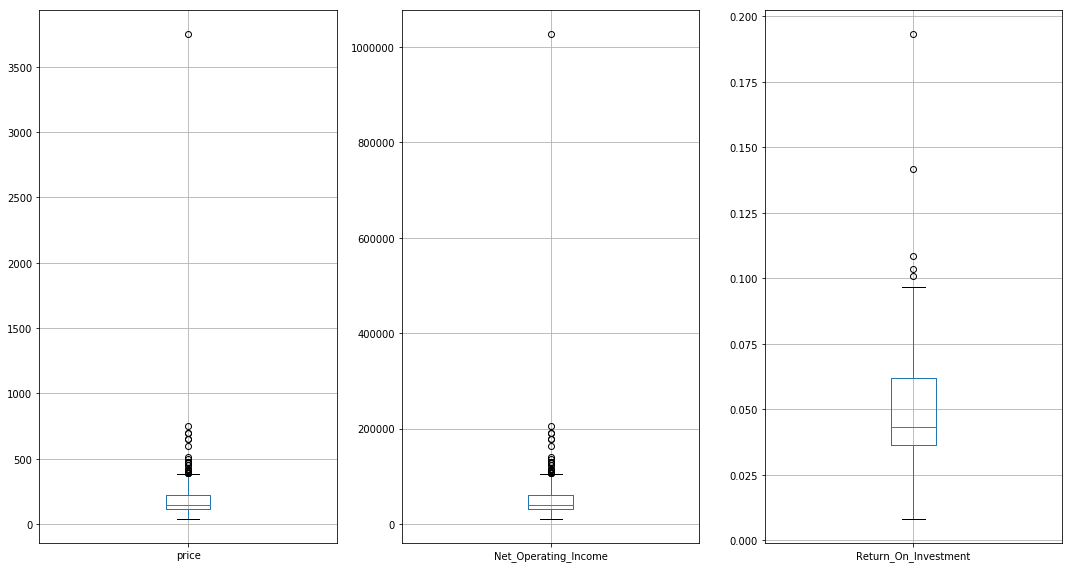

In [16]:
# Set figure size
plt.figure(figsize=(15,8))

# Plot for price column
plt.subplot(1, 3, 1) # create a 1x3 matrix
profit.boxplot(column=['price'])

# Plot for Net_Operating_Income column
plt.subplot(1, 3, 2)
profit.boxplot(column=['Net_Operating_Income'])

# Plot for Net_Operating_Income column
plt.subplot(1, 3, 3)
profit.boxplot(column=['Return_On_Investment'])

# format the graph and save to local
plt.tight_layout()
plt.savefig('Output/Boxplot of Three measures.png')
plt.show()

## <font color='red'> Insights on Boxplot
##### After plotting the boxplots for the three major measurements, the following insights are concluded.¶
    
1. boxplots of price, Net_Operating_Income and Return_On_Investment are all negatively skewed.
2. majority of outliers are on the right tails for all three. 
3. Net Operating Income and Price of properties on each location are very spreaded out, values are very polarized.
3. in this case, mean/average is not a good representative of the group, median is a better option. Thus, in later grouping process, median will be used instead of mean.

## <font color='organce'>3.2 Barh Graph and Table of Ranking 
    
##   <font color='organce'> * 3.2.1 Barh Graph
##### An interactive barh graph is created which displays the values in a vector as horizontal bars.

In [17]:
# Create a boroughs_list that contains all unique boroughs and an option of 'ALL'
boroughs_list=list(profit.boroughs.unique())
boroughs_list.insert(0, 'All') 

# Create an interactive graph using IPython widgets ( ipywidgets)
@interact
def plotting_bar_chart(# 1. options to filter by boroughts
                       boroughs=boroughs_list, 
                       # 2. options to filter by measurements
                       Rate_by=['price','Net_Operating_Income','cost','Return_On_Investment'], 
                       # 3. options to display top x number of result
                       Top=(0, 20)):
    
    # Scenario 1: when 'All' broughts are selected
    if boroughs == 'All':
        print(' * The following Barh Graph can be filtered by selecting different filter options (boroughs or measurements)')
        print(' * Users can choose to see which boroughs and measurement to display, also can vary the number of ranking.')
        print(' * It serves in a descending order, the bar the bottom has the highest values.\n')
        
        # 1. group the non-null dataset by zipcode
            # and output the median of (price, NOI, cost or ROI) for each group
        df = profit.loc[profit[Rate_by].notnull()].groupby(['zipcode'],as_index=False)[Rate_by].median()
        
        # 2. Sort the dataset in descending order based on (price, NOI, cost or ROI)
        df.sort_values(Rate_by,inplace=True, ascending=False)
        
        # 3. Plot barh chart with the selected type of measurement (price, NOI, cost or ROI)  
        return df.head(int(Top)).plot(kind='barh',y=Rate_by,x='zipcode',color='g',
                                title='Ranking by '+Rate_by,fontsize=12,figsize=(10,5))
    
    
    # Scenario 2: when one of the broughts is selected
    elif boroughs != 'All':
        print(' * The following Barh Graph can be filtered by selecting different filter options (boroughs or measurements)')
        print(' * Users can choose to see which boroughs and measurement to display, also can vary the number of ranking.')
        print(' * It serves in a descending order, the bar the bottom has the highest values.\n')
        
        # Scenario 2.1: when there are enough "price, NOI, cost or ROI" variables 
                       # in the selected borough for ploting
        try:
            # 1. subset the dataset by selected borough
            df = profit.loc[profit['boroughs']==boroughs]
            
            # 2. group the non-null dataset by zipcode
                # and output the median of (price, NOI, cost or ROI) for each group
            df = df.loc[df[Rate_by].notnull()].groupby(['zipcode'],as_index=False)[Rate_by].median()
            
            # 3. Sort the dataset in descending order based on (price, NOI, cost or ROI)
            df.sort_values(Rate_by,inplace=True, ascending=False)
            
            # 4. Plot barh chart with the selected type of measurement (price, NOI, cost or ROI)
            return df.head(int(Top)).plot(kind='barh',y=Rate_by,x='zipcode',color='b',
                                    title='Ranking by '+Rate_by,fontsize=12,figsize=(10,5))
        
        # Scenario 2.2: when there are NOT enough "price, NOI, cost or ROI" variables 
                        # in the selected borough for ploting
                        # Due to lack of cost data
        except:
            print('There is not enought '+Rate_by+' entries in '+boroughs+
                  ' for plotting. \nPlease try selecting ALL boroughs or other boroughs')

interactive(children=(Dropdown(description='boroughs', options=('All', 'Manhattan', 'Brooklyn', 'Staten Island…

## <font color='organce'>* 3.2.2 Table of Ranking 
###### The interactive table shows the top x number of properties with the highest price, NOI, cost or ROI. 

In [18]:
@interact
def plotting_zipcode_table(# 1. options to filter by boroughts
                           boroughs=boroughs_list,
                           # 2. options to filter by measurements
                           Rate_by=['price','Net_Operating_Income','cost','Return_On_Investment'],
                           # 3. options to display top x number of result
                           Top=(0, 20)):
    
    # Scenario 1: when 'All' broughts are selected
    if boroughs == 'All':
        print(' * The following Table can be filtered by selecting different filter options (boroughs or measurements)')
        print(' * Users can choose to see which boroughs and measurement to display, also can vary the number of ranking.')
        print(' * It serves in a descending order, the record at the top has the highest values.\n')
        print(' * Since a zipcode can cover multiple neighbourhoods, neighbourhoods that shared the same zipcode will')
        print('    also be displayed in the table.\n')

        # 1. subset the dataset by selected borough
        df = profit.loc[profit[Rate_by].notnull()].groupby(['zipcode'],as_index=False)[Rate_by].median()
        
        # 2. Sort the dataset in descending order based on (price, NOI, cost or ROI)
        df.sort_values(Rate_by,inplace=True, ascending=False)
        
        # 3. create a list of zipcode of the top properties
        top_zipcode = list(df.head(int(Top)).zipcode.values) 
        
        # 4. create a subset dataset with needed fields 
        t = profit[['zipcode','boroughs','neighbourhoods',Rate_by]]
        
        # 5. create an empty dataframe for for-loop
        show_df = pd.DataFrame()
        
        # 6. inserting boroughs and neighbourhoods information of those top properties to show_df
        for i in top_zipcode:
            s = t.loc[t.zipcode==i] 
            show_df = show_df.append(s) 
        
        # 7. return the result table 
        return show_df.reset_index(drop=True)
    
    
    # Scenario 2: when one of the broughts is selected
    elif boroughs != 'All':
        print(' * The following Table can be filtered by selecting different filter options (boroughs or measurements)')
        print(' * Users can choose to see which boroughs and measurement to display, also can vary the number of ranking.')        
        print(' * It serves in a descending order, the record at the top has the highest values.\n')
        print(' * Since a zipcode can cover multiple neighbourhoods, neighbourhoods that shared the same zipcode will')
        print('    also be displayed in the table.\n')
        
        # Scenario 2.1: when there are enough "price, NOI, cost or ROI" variables 
                       # in the selected borough for ploting
        try:
            # 1. subset the dataset by selected borough
            df = profit.loc[profit['boroughs']==boroughs]
            # 2. group the non-null dataset by zipcode
                # and output the median of (price, NOI, cost or ROI) for each group
            df = df.loc[df[Rate_by].notnull()].groupby(['zipcode'],as_index=False)[Rate_by].median()
            # 3. Sort the dataset in descending order based on (price, NOI, cost or ROI)
            df.sort_values(Rate_by,inplace=True, ascending=False)
            
            # 3. create a list of zipcode of the top properties
            top_zipcode = list(df.head(int(Top)).zipcode.values)
            
            # 4. create a subset dataset with needed fields
            t = profit[['zipcode','boroughs','neighbourhoods',Rate_by]]
            
            # 5. create an empty dataframe for for-loop
            show_df = pd.DataFrame()
            
            # 6. inserting boroughs and neighbourhoods information of those top properties to show_df
            for i in top_zipcode:
                s = t.loc[t.zipcode==i]
                show_df = show_df.append(s)
            
            # 7. return the result table
            return show_df.reset_index(drop=True)
    
    
        # Scenario 2.2: when there are NOT enough "price, NOI, cost or ROI" variables 
                        # in the selected borough for ploting
                        # Due to lack of cost data
        except:
            print('There is not enought '+Rate_by+' entries in '+boroughs+
                  ' for plotting. \nPlease try selecting ALL boroughs or other boroughs')

interactive(children=(Dropdown(description='boroughs', options=('All', 'Manhattan', 'Brooklyn', 'Staten Island…

## <font color='organce'>* 3.2.3 Saving Barh Graph to local <font color='blue'>(can be ignored)<font color='black'>
##### The following code is basically showing the same result as the above Barh Graph 
It saves the the Top 15 Ranking results of all boroughs based on Price, Net Operating Income or Return_On_Investment to local Output folder

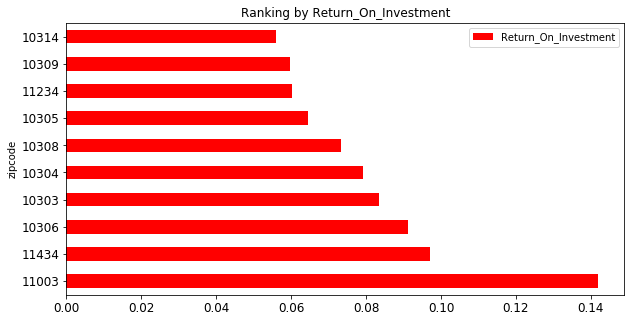

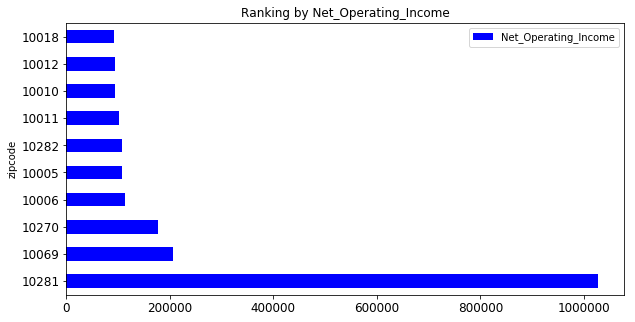

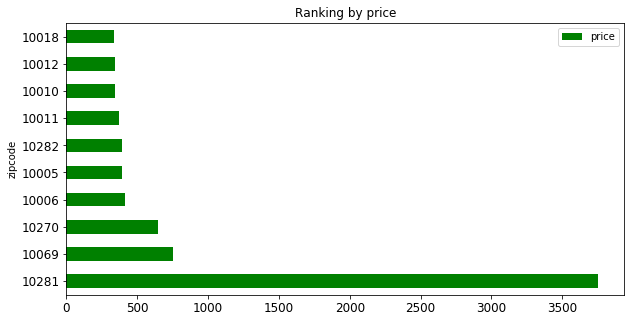

In [19]:
def barh_graphing(df, measurement, color):
    
    #1. Group the non-null dataset by zipcode and output the median of (price, NOI, cost or ROI) for each group
    measurement_df = df.loc[df[measurement].notnull()].groupby(['zipcode'],
                            as_index=False)[measurement].median()
    
    #2. Sort the dataset in descending order based on (price, NOI, cost or ROI)
    measurement_df.sort_values(measurement, inplace=True, ascending=False)
    
    #3. Plot the barh graph of top 10 zipcode
    measurement_df.head(10).plot(kind='barh',y=measurement,x='zipcode',color=color,
                                 title='Ranking by '+measurement, fontsize=12,figsize=(10,5))
    
    #4. Save barh graph to local
    plt.savefig('Output/Top 10 Zipcode Ranking by '+measurement+'.png')

# execute function for Return_On_Investment, Net_Operating_Income and price.
barh_graphing(df=profit, measurement='Return_On_Investment', color='r')
barh_graphing(df=profit, measurement='Net_Operating_Income', color='b')
barh_graphing(df=profit, measurement='price', color='g')

## <font color='organce'>3.3 Geographic Heatmap
##### Geographic heatmaps allow us to compare and contrast relative price, NOI, cost or ROI between different zipcode on a map, at a glance.

In [20]:
##############################
# Import latitude and longitude from airbnb dataset
##############################
#1. subseting needed location columns
zip_locate = airbnb[['zipcode','latitude','longitude']] 

#2. removing missing values in the table
zip_locate = zip_locate.dropna().reset_index(drop=True) 

#3. formatting zipcode to correct format (int)
zip_locate['zipcode'] = zip_locate['zipcode'].map(lambda x: int(float(str(x)[:5]))) 

#4. removing duplicated entries
zip_locate = zip_locate.groupby(['zipcode'],as_index=False)['latitude','longitude'].median()

#5. save table to local
zip_locate.to_csv('Data/XYAO_nyc_Zipcode_Latitude_and_Longitude.csv')
zip_locate.to_csv('Output/XYAO_nyc_Zipcode_Latitude_and_Longitude.csv')

##############################
# Quality check 
##############################
#1. checking column-level data type
print(zip_locate.dtypes)

#2. checking missing value
print(zip_locate.isnull().sum())

#3. checking table format
zip_locate.head()

zipcode        int64
latitude     float64
longitude    float64
dtype: object
zipcode      0
latitude     0
longitude    0
dtype: int64


,zipcode,latitude,longitude
0,7093,40.768930,-73.996540
1,7302,40.728930,-73.995120
2,10001,40.748520,-73.994575
3,10002,40.718215,-73.989445
4,10003,40.730050,-73.987620


##### An Interactive Geographic Heatmap is generated (can select different borought based on different measurement: Price, NOI, cost or ROI

In [21]:
# Create a boroughs_list that contains all unique boroughs and an option of 'ALL'
boroughs_list=list(profit.boroughs.unique())
boroughs_list.insert(0, 'All') 

@interact
def geographic_heatmap(boroughs=boroughs_list,
                       Rate_by=['price','Net_Operating_Income','cost','Return_On_Investment']):
    
    # Scenario 1: when 'All' broughts are selected
    if boroughs == 'All':
        print('* The following Geographic Heatmap can be filtered by selecting different filter options (boroughs or measurements)')
        print('* Users can choose to see which boroughs and measurement to display.\n')
        print('* The brighter color spots indicate higher value in selected measurement, and the light colors indicate lower value.\n') 
        print('* Since there are not enough cost data for Staten Island and Bronx, there is no heat showing when selecting "COST"') 
        print('   or "ROI" for these two boroughs.\n')
        
        # 1. group the non-null dataset by zipcode and output the median of (price, NOI, cost or ROI) for each group
        df = profit.loc[profit[Rate_by].notnull()].groupby(['zipcode'],as_index=False)[Rate_by].median()
        
        # 2. allocate latitude and Longitude for each zipcode in the dataset
        df_heatmap = df.merge(zip_locate, left_on='zipcode',right_on = 'zipcode',how='left')
        
        # 3. Remove 3 missing values (three zipcodes cannot locate Latitude and Longitude to)
        df_heatmap = df_heatmap.dropna().reset_index(drop=True)
        
        # 4. Set the max_val 
        max_amount = float(df_heatmap[Rate_by].max())
        
        # 5. Set the starting location with NYC Latitude and Longitude
        hmap = folium.Map(location=[40.730610, -73.935242], zoom_start=10)
        
        # 6. Setup key parameters for the heatmap
        hm_wide = HeatMap(list(zip(df_heatmap.latitude.values,df_heatmap.longitude.values, 
                                   df_heatmap[Rate_by].values)),
                                   min_opacity=5,
                                   max_val=max_amount,
                                   radius=17, blur=20, 
                                   max_zoom=1)
        
        # 7. Show the heatmap
        return hmap.add_child(hm_wide)

    # Scenario 2: when one of the broughts is selected
    elif boroughs != 'All':
        print('* The following Geographic Heatmap can be filtered by selecting different filter options (boroughs or measurements)')
        print('* Users can choose to see which boroughs and measurement to display.\n')
        print('* The brighter color spots indicate higher value in selected measurement, and the light colors indicate lower value.\n')        
        print('* Since there are not enough cost data for Staten Island and Bronx, there is no heat showing when selecting "COST"') 
        print('   or "ROI" for these two boroughs.\n')
        
        # Scenario 2.1: when there are enough "price, NOI, cost or ROI" variables 
                       # in the selected borough for ploting
        try:
            # 1. subset the dataset by selected borough
            df = profit.loc[profit['boroughs']==boroughs] 
            
            # 2. group the non-null dataset by zipcode and output the median of (price, NOI, cost or ROI) for each group
            df = df.loc[profit[Rate_by].notnull()].groupby(['zipcode'],as_index=False)[Rate_by].median()
            
            # 3. allocate latitude and Longitude for each zipcode in the dataset
            df_heatmap = df.merge(zip_locate, left_on='zipcode',right_on = 'zipcode',how='left')
            
            # 4. Remove 3 missing values (three zipcodes cannot locate Latitude and Longitude to)
            df_heatmap = df_heatmap.dropna().reset_index(drop=True)
            
            # 5. Set the max value parameter 
            max_amount = float(df_heatmap[Rate_by].max())
            
            # 6. Set the starting location with NYC Latitude and Longitude
            hmap = folium.Map(location=[40.730610, -73.935242], zoom_start=12)

            # 7. Setup key parameters for the heatmap
            hm_wide = HeatMap(list(zip(df_heatmap.latitude.values,df_heatmap.longitude.values, 
                                       df_heatmap[Rate_by].values)),
                                       min_opacity=5,
                                       max_val=max_amount,
                                       radius=17, blur=20, 
                                       max_zoom=1)
            
            # 8. Show the heatmap
            return hmap.add_child(hm_wide)

        # Scenario 2.2: when there are NOT enough "price, NOI, cost or ROI" variables 
                        # in the selected borough for ploting
                        # Due to lack of cost data            
        except:
            print('There is not enought '+Rate_by+' entries in '+boroughs+
                  ' for plotting. \nPlease try selecting ALL boroughs or other boroughs')

interactive(children=(Dropdown(description='boroughs', options=('All', 'Manhattan', 'Brooklyn', 'Staten Island…

# <font color='organce'>4.0 Investment Recommendations 
##### <font size=3>* According to above analysis, it is recommended for the company to invest properties in the following zipcodes in each borough. 
<font size=3>
* <font color='red'>Manhattan<font color='black'>: 10003, 10013, 10011, 10006, 10014
* <font color='red'>Brooklyn<font color='black'>: 11201, 11217, 11231, 11215
* <font color='red'>Staten Island<font color='black'>: 10305, 10303, 10306
* <font color='red'>Bronx<font color='black'>: 10467
* <font color='red'>Queens<font color='black'>: 11434, 11003, 11435, 11694

##### <font size=3>* Detailed ranking of each measurement tool for each borough is listed below. 
1. All Boroughts
    * Based on Net Operating Income:
        * Zipcode: 10281, 10069, 10270， 10006 and 10005
        * Boroughs: Manhattan
        * neighbourhoods: Battery Park City, Upper West Side, Financial District, Midtown, Tribeca
    * Based on cost:
        * Zipcode: 10013, 10014, 10011, 10003 and 10023 
        * Boroughs: Manhattan
        * neighbourhoods: Bergen Beach, Chinatown, Little Italy, Nolita, SoHo, Tribeca, Chelsea, Greenwich Village, West Village, Civic Center, East Village, Gramercy, Lower East Side, NoHo, Midtown and Upper West Side.
    * Based on Return_On_Investment:
        * Zipcode: 11003, 11434, 10306, 10303, and 10304 
        * Boroughs: Queens and Staten Island
        * neighbourhoods: Cambria Heights,  Jamaica, Springfield Gardens, Midland Beach, Oakwood, Graniteville, Howland Hook, Mariners Harbor, Clifton, Grymes Hill and Stapleton.
    
2. Manhattan
    * Based on Net Operating Income:
        * Zipcode: 10281, 10069, 10270， 10013 and 10006
        * neighbourhoods: Battery Park City, Upper West Side, Financial District, Bergen Beach, Chinatown, Little Italy, Nolita, SoHo, Battery Park City, Midtown, Tribeca
    * Based on Cost:
        * Zipcode: 10013, 10014, 10011, 10003 and 10023 
        * neighbourhoods: Little Italy, Nolita, SoHo, Tribeca, Chelsea, Greenwich Village, West Village, Civic Center, East Village, Gramercy, Lower East Side, NoHo, Midtown and Upper West Side.
    * Based on Return_On_Investment:
        * Zipcode: 10036, 10025, 10011, 10003 and 10022 
        * neighbourhoods: Hell's Kitchen, Midtown, Theater District, Morningside Heights, Upper West Side, Chelsea, Greenwich Village, West Village, Civic Center, East Village, Gramercy, Lower East Side, NoHo and Midtown
            
2. Brooklyn
    * Based on Net Operating Income:
        * Zipcode: 11249, 11201, 11222, 11385 and 11211.
        * neighbourhoods: Williamsburg, Boerum Hill, Brooklyn Heights, Carroll Gardens, Cobble Hill, Columbia St, DUMBO, Downtown Brooklyn, Fort Greene, Vinegar Hill, Greenpoint, Bushwick, Glendale and Ridgewood
    * Based on Cost:
        * Zipcode: 10013, 11201, 11217, 11231 and 11215
        * neighbourhoods: Bergen Beach, Boerum Hill, Brooklyn Heights, Carroll Gardens, Cobble Hill, Columbia St, DUMBO, Downtown Brooklyn, Fort Greene, Vinegar Hill, Carroll Gardens, Fort Greene, Gowanus, Park Slope, Prospect Heights, Gowanus, Red Hook, Gowanus, Park Slope, South Slope, Sunset Park, Windsor Terrace
    * Based on Return_On_Investment:
        * Zipcode: 11234, 11231, 11201, 11215 and 11217 
        * neighbourhoods: East Flatbush, Flatlands, Mill Basin, Carroll Gardens, Cobble Hill, Columbia St, Gowanus, Red Hook, Boerum Hill, Brooklyn Heights, DUMBO, Downtown Brooklyn, Fort Greene, Vinegar Hill, Park Slope, South Slope, Sunset Park, Windsor Terrace, Prospect Heights and Windsor Terrace
        
3. Staten Island
    * Based on Net Operating Income:
        * Zipcode: 10310, 10306, 10308, 10303 and 10305
        * neighbourhoods: Castleton Corners, Randall Manor, West Brighton, Midland Beach, Oakwood, Great Kills, Graniteville, Howland Hook, Mariners Harbor, Arrochar, Concord, Dongan Hills, Rosebank, Shore Acres and South Beach
    * Based on Cost:
        * Zipcode: 10305, 10308, 10309, 10314 and 10306
        * neighbourhoods: Arrochar, Concord, Dongan Hills, Rosebank, Shore Acres, South Beach, Great Kills, Prince's Bay, Emerson Hill, New Springville, Midland Beach and Oakwood.
    * Based on Return_On_Investment:
        * Zipcode: 10306, 10303, 10304, 10308 and 10305
        * neighbourhoods: Midland Beach, Oakwood, Graniteville, Howland Hook, Mariners Harbor, Clifton, Grymes Hill, Stapleton, Great Kills, Arrochar, Concord, Dongan Hills, Rosebank, Shore Acres and South Beach.
        
4. Bronx
    * Based on Net Operating Income:
        * Zipcode: 10460, 10467, 10452, 10475 and 10471
        * neighbourhoods: Van Nest, West Farms, Norwood, Olinville, Williamsbridge, Concourse, Highbridge, Eastchester and North Riverdale.
    * Based on Cost:
        * Zipcode: ----
        * neighbourhoods: ----
    * Based on Return_On_Investment:
        * Zipcode: ----  
        * neighbourhoods: ----
       
5. Queens
    * Based on Net Operating Income:
        * Zipcode: 11357, 11559, 11694, 11361 and 11435.
        * neighbourhoods: Whitestone, Far Rockaway, Belle Harbor, Neponsit, Bayside, Briarwood and Jamaica.
    * Based on Cost:
        * Zipcode: 11434 and 11003
        * neighbourhoods: Jamaica, Springfield Gardens and Cambria Heights
    * Based on Return_On_Investment:
        * Zipcode: 11003 and  11434
        * neighbourhoods: Cambria Heights, Jamaica and Springfield Gardens.       

# <font color='organce'>5.0 Future Research 
<font size=3> 

#### 1. Data Collection
* Only 83 zipcode have cost values, the remaining 300 properties have missing values on cost. 
* Due to large missing values on cost when merging with revenue dataset, the validity of ROI for measuring profitability is negatively impacted.
* Further data collection should be taken to complete the cost dataset to increase overall quality of the datasets. 
* Additionally, completing the cost data for the 90s to 2017 can also improve data quality. 

#### 2. Data Visualization    
* Time Series Graphing
    * if the cost dataset achieves higher degree of completion，a time series graph can be built for cost 
    * if past revenue data can also be collected, a time series graph can be built to reveal the trending of price,  cost and profit of short-term rental. 
    
* Other advanced visualization 
    * Due to limitation of time and dataset amount, visualization tools used are limited.
    * Plotly or Tableau can be used for a further exploration of data visualization
    
* Dashboard
    * Plotly and Tableau can also be used to generate a Dashboard which is a clear and organized presentation of analysis result. 
    
#### 4. Data Modeling 
* There are many other features can be considered into this project: e.g. number of bathroom, property type (house, apartment, etc.). Considering more features of properties can increase the reliability of analysis.
* Predictive Models can be built to predict price, cost or profit in any boroughs. 

    